# Linear Regression

Linear regression is a statistical method that is used to find the relationship between two variables. The linear regression line is a line that best fits the data points in a scatter plot. There are several methods to find the linear regression line, some of which are:

- Least Squares Method: This is the most common method for finding the linear regression line. It involves finding the line that minimizes the sum of the squared distances between the data points and the line. This method is based on the principle of minimizing the vertical distances between the data points and the line.

- Correlation Coefficient Method: The correlation coefficient method involves finding the correlation coefficient between the two variables. The correlation coefficient is a measure of the strength of the linear relationship between the variables. The linear regression line is then calculated using the slope of the line which is the product of the standard deviation of the y variable and the correlation coefficient, divided by the standard deviation of the x variable.

- Graphical Method: The graphical method involves plotting the data points on a scatter plot and drawing a line that appears to fit the data best. This method is subjective and may not always produce the most accurate results.

- Maximum Likelihood Estimation: This method involves finding the line that maximizes the likelihood of observing the data. It requires assumptions about the distribution of the errors or residuals, which are the differences between the predicted values and the actual values.

- Gradient Descent: Gradient descent is an iterative optimization algorithm that can be used to find the linear regression line. It involves starting with an initial guess for the slope and intercept of the line and iteratively updating these values based on the direction of the gradient of the cost function, which measures the error between the predicted values and the actual values.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score

the image provided Linear regression error is the mean squared error 
minimizing the error will hence give the best linear regression line

In [12]:
data = pd.read_csv('LinearRegression.csv')
data

,X,Y
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


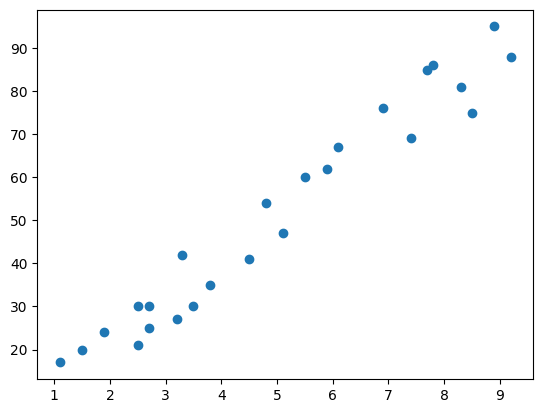

In [13]:
plt.scatter(data.X, data.Y)
plt.show()

## Gradient Descent method

In [14]:
def loss_function(m , b, points):
    totalError = 0
    for i in range(len(points)):
        x = points.iloc[i].X
        y = points.iloc[i].Y
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

In [15]:
# differentiating the loss function with respect to m and b
# we get the following equations for the gradient of m and b
# m_gradient = -(2/N) * x * (y - ((m * x) + b))
# b_gradient = -(2/N) * (y - ((m * x) + b))

# by differentiating the loss function we maximize the loss function
# and by subtracting it from m and b we get lowest loss function
# hence the most optimal line

def gradient_descent(m_now,b_now,points,L):
    m_gradient = 0
    b_gradient = 0
    N = float(len(points))
    for i in range(len(points)):
        x = points.iloc[i].X
        y = points.iloc[i].Y
        m_gradient += -(2/N) * x * (y - ((m_now * x) + b_now))
        b_gradient += -(2/N) * (y - ((m_now * x) + b_now))
    new_m = m_now - (L * m_gradient)
    new_b = b_now - (L * b_gradient)
    return [new_m, new_b]

In [40]:
m_grad = 1
b_grad = 0
# learning rate
L = 0.0001
epochs = 10000

In [41]:
for i in range(epochs):
    m_grad, b_grad = gradient_descent(m_grad, b_grad, data, L)
    print("{} m {}, b {}, loss {}".format(i,m_grad, b_grad, loss_function(m_grad, b_grad, data)))

0 m 1.05732296, b 0.0092936, loss 2625.9543552204386
1 m 1.1142784364837697, b 0.018527880744896003, loss 2592.769074270288
2 m 1.1708687850381356, b 0.027703222464015693, loss 2560.007867754237
3 m 1.227096346150511, b 0.03682000294940066, loss 2527.665316425946
4 m 1.282963445305683, b 0.04587859757142951, loss 2495.7360702916103
5 m 1.3384723930819806, b 0.05487937929434081, loss 2464.2148477249907
6 m 1.3936254852468255, b 0.06382271869165657, loss 2433.0964345937336
7 m 1.4484250028516703, b 0.07270898396150682, loss 2402.3756833968773
8 m 1.5028732123263293, b 0.08153854094185602, loss 2372.047512413361
9 m 1.5569723655727032, b 0.09031175312563174, loss 2342.1069048614304
10 m 1.6107247000579041, b 0.09902898167575654, loss 2312.548908068772
11 m 1.6641324389067826, b 0.10769058544008334, loss 2283.3686326532675
12 m 1.7171977909938625, b 0.11629692096623516, loss 2254.561251714196
13 m 1.7699229510346863, b 0.12484834251634966, loss 2226.122000033796
14 m 1.8223100996765749, b 

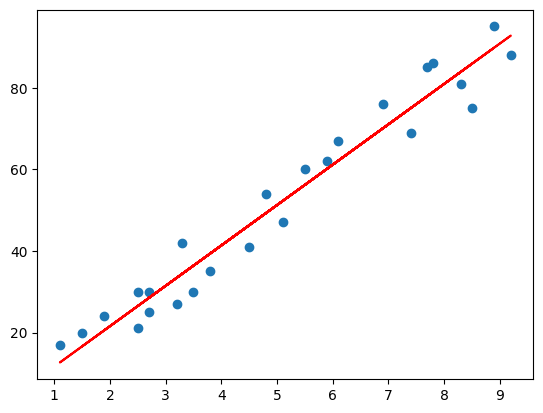

In [42]:
plt.scatter(data.X, data.Y)
plt.plot(data.X, m_grad * data.X + b_grad, color='red')
plt.show()


In [43]:
print(m_grad,b_grad)

9.890380898838723 1.7738457009676127


In [20]:
# prediction value
predict = input()
print( m_grad * float(predict) + b_grad)

90.78709034549186


## Least square method

In [21]:
x = data.X
y = data.Y

In [22]:
mean_x = sum(x) / len(x)
mean_y = sum(y) / len(y)

# Calculate the terms needed for the numerator and denominator of the slope
numerator = sum((xi - mean_x) * (yi - mean_y) for xi, yi in zip(x, y))
denominator = sum((xi - mean_x) ** 2 for xi in x)

# Calculate the slope and intercept of the regression line
m_sqr = numerator / denominator
b_sqr = mean_y - m_sqr * mean_x

In [23]:
print(m_sqr, b_sqr)

9.775803390787475 2.4836734053731746


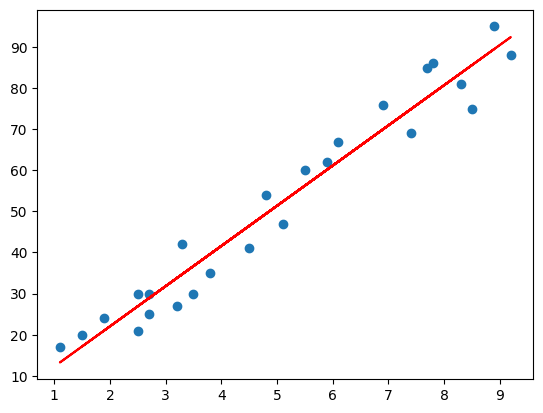

In [24]:
plt.scatter(x, y)
plt.plot(x, m_sqr * x + b_sqr, color='red')
plt.show()

## Evaluation of linear regression model

There are several methods for evaluating a linear regression model. Here are some common methods:

- R-squared: R-squared (or coefficient of determination) is a measure of how well the regression line fits the data. It ranges from 0 to 1, where 1 indicates a perfect fit. R-squared can be calculated using the r2_score function from the sklearn.metrics module in Python.

- Mean Squared Error (MSE): MSE measures the average of the squared differences between the predicted and actual values. It is calculated as the sum of the squared differences divided by the number of observations. A lower MSE indicates a better fit. MSE can be calculated using the mean_squared_error function from the sklearn.metrics module in Python.

- Root Mean Squared Error (RMSE): RMSE is the square root of MSE and measures the average magnitude of the residuals. Like MSE, a lower RMSE indicates a better fit. RMSE can be calculated using the mean_squared_error function and then taking the square root of the result.

- Mean Absolute Error (MAE): MAE is the average of the absolute differences between the predicted and actual values. It measures the average magnitude of the errors, without considering their direction. MAE can be calculated using the mean_absolute_error function from the sklearn.metrics module in Python.

- Residual plots: Residual plots show the differences between the predicted and actual values. A good residual plot should show a random, symmetric pattern with no discernible trend. Any pattern in the residuals may indicate that the linear regression model is not a good fit for the data.

**R^2**

In [29]:
y_pred_lsq = [m_sqr * x + b_sqr for x in data.X]
y_pred_lsq

[26.92318188234186,
 52.3402706983893,
 33.7662442558931,
 85.57800222706672,
 36.69898527312934,
 17.147378491554388,
 92.42106460061794,
 56.250592054704285,
 83.62284154890924,
 28.87834256049936,
 77.75735951443673,
 60.16091341101928,
 46.47478866391681,
 34.74382459497184,
 13.237057135239398,
 89.48832358338171,
 26.92318188234186,
 21.057699847869376,
 62.11607408917677,
 74.8246184972005,
 28.87834256049936,
 49.40752968115305,
 39.63172629036558,
 69.93671680180677,
 78.73493985351547]

In [30]:
r2_score(data.Y, y_pred_lsq)

0.9529481969048356

In [44]:
y_pred_grad = [m_grad * x + b_grad for x in data.X]
y_pred_grad

[26.49979794806442,
 52.214788285045096,
 33.42306457725153,
 85.84208334109675,
 36.39017884690314,
 16.609417049225698,
 92.76534997028385,
 56.17094064458059,
 83.86400716132901,
 28.477874127832166,
 77.92977862202578,
 60.127093004116084,
 46.28055974574187,
 34.41210266713539,
 12.653264689690209,
 89.79823570063225,
 26.49979794806442,
 20.565569408761185,
 62.10516918388382,
 74.96266435237416,
 28.477874127832166,
 49.24767401539348,
 39.35729311655476,
 70.0174739029548,
 78.91881671190966]

In [45]:
r2_score(data.Y, y_pred_grad)

0.9527873510093475